In [1]:
import pandas as pd
from autogen_core.models import UserMessage
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [2]:
gt = pd.read_csv('./orqa.csv')
len(gt)

1000

In [3]:
gt.columns

Index(['country_tag', 'type', 'difficulty', 'success', 'r_rsc_id', 's_rsc_id',
       'r_pkg_id', 's_pkg_id', 'r_rsc_name', 's_rsc_name', 'r_col_name',
       's_col_name', 'sql', 'nl', 'sql_success', 'sql_time', 'sql_n_rev',
       'sql_review', 'sql_intok', 'sql_outok', 'nl_time', 'nl_n_rev',
       'nl_review', 'nl_intok', 'nl_outok', 'tot_time'],
      dtype='object')

In [4]:
filtered_gt = gt[['country_tag', 'type', 'difficulty', 'success', 'r_rsc_id', 's_rsc_id', 'r_pkg_id', 's_pkg_id', 'r_col_name',
       's_col_name', 'sql', 'nl', 'sql_success', 'tot_time']].copy()

filtered_gt.head()

,country_tag,type,difficulty,success,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,r_col_name,s_col_name,sql,nl,sql_success,tot_time
0,UK,single-table,simple,True,daabf87c-ac22-49c7-8812-8dd59ddc25a0,NaN,4971bfb5-310b-464a-b557-8cf84038b46c,NaN,NaN,NaN,SELECT * FROM R WHERE country_code = 'e';,Could you show me the details of Natura 2000 s...,success,10.761
1,UK,single-table,simple,True,17059225-f673-41ba-9224-c2a6722b9216,NaN,f24c1e1c-f20f-4e31-979e-db929771bdaf,NaN,NaN,NaN,"SELECT species, COUNT(*) AS number_of_tests FR...",How many different tests were conducted on eac...,success,11.265
2,UK,single-table,simple,True,e27296d6-0d62-4f95-84cb-7efb9b43ec01,NaN,ea639e00-f6af-4f7f-926b-9c7530350015,NaN,NaN,NaN,"SELECT department_family, entity FROM R WHERE ...",Which departments and entities within the Mini...,success,11.180
3,UK,multi-table-join,moderate,True,d996bf42-fabe-4236-93b1-df4402ef3f39,b5b04166-cee5-4472-8fc1-57bee087f39a,87e88687-e6f8-4710-b32b-1b11665e206a,dd2a5b45-9849-47be-89b1-6d41e40c05e7,generic_job_title,generic_job_title,"SELECT R.generic_job_title, AVG(R.payscale_min...",What are the average minimum salaries at the V...,success,15.454
4,UK,single-table,challenging,True,e67b73ea-884b-42e6-bfdc-6f327dac6f90,NaN,fff4cc89-d266-42dd-a9e3-9877db1e05fc,NaN,NaN,NaN,"WITH RankedPosts AS ( SELECT *, ROW_NUMBER() O...",Who holds the highest paying position in each ...,success,13.132


In [5]:
can = filtered_gt[filtered_gt['country_tag']=='CAN'].reset_index(drop=True).copy()
can.head()

,country_tag,type,difficulty,success,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,r_col_name,s_col_name,sql,nl,sql_success,tot_time
0,CAN,single-table,moderate,True,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,NaN,NaN,"SELECT ""department_/_minista_re"", SUM(""payment...",What is the total amount paid by each departme...,success,79.261
1,CAN,single-table,challenging,True,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,NaN,NaN,"WITH RankedPayments AS ( SELECT *, ROW_NUMBER(...",Which supplier received the highest payment fr...,success,86.872
2,CAN,single-table,simple,True,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,NaN,NaN,"SELECT * FROM R WHERE ""payment_/_paiement"" > 1...","Which suppliers received payments over $100,00...",success,81.511
3,CAN,single-table,moderate,True,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,NaN,NaN,"SELECT ""department_/_minista_re"", SUM(""payment...",According to the Government of New Brunswick’s...,success,110.778
4,CAN,single-table,challenging,True,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,NaN,NaN,"WITH RankedPayments AS (SELECT *, ROW_NUMBER()...",According to the Government of New Brunswick’s...,success,95.160


In [6]:
gt.groupby(['country_tag', 'difficulty']).count()

type  success  r_rsc_id  s_rsc_id  r_pkg_id  \
country_tag difficulty                                                 
CAN         challenging   172      172       172        37       172   
            moderate      190      190       190        37       190   
            simple        138      138       138        35       138   
UK          challenging   147      147       147        46       147   
            moderate      179      179       179        60       179   
            simple        174      174       174        69       174   

                         s_pkg_id  r_rsc_name  s_rsc_name  r_col_name  \
country_tag difficulty                                                  
CAN         challenging        37         172          37          37   
            moderate           37         190          37          37   
            simple             35         138          35          35   
UK          challenging        46          96          31          46   
            moderate           60         114          40          60   
            simple             69         125          49          69   

                         s_col_name  ...  sql_n_rev  sql_review  sql_intok  \
country_tag difficulty               ...                                     
CAN         challenging          37  ...        172           0        172   
            moderate             37  ...        190           0        190   
            simple               35  ...        138           0        138   
UK          challenging          46  ...        147           0        147   
            moderate             60  ...        179           0        179   
            simple               69  ...        174           0        174   

                         sql_outok  nl_time  nl_n_rev  nl_review  nl_intok  \
country_tag difficulty                                                       
CAN         challenging        172      172       172          0       172   
            moderate           190      190       190          0       190   
            simple             138      138       138          0       138   
UK          challenging        147      147       147          0       147   
            moderate           179      179       179          0       179   
            simple             174      174       174          0       174   

                         nl_outok  tot_time  
country_tag difficulty                       
CAN         challenging       172       172  
            moderate          190       190  
            simple            138       138  
UK          challenging       147       147  
            moderate          179       179  
            simple            174       174  

[6 rows x 24 columns]

In [7]:
can_questions = can[['country_tag', 'type', 'difficulty', 'r_rsc_id', 's_rsc_id', 'r_pkg_id', 's_pkg_id', 'nl']]
can_questions

,country_tag,type,difficulty,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,nl
0,CAN,single-table,moderate,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,What is the total amount paid by each departme...
1,CAN,single-table,challenging,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,Which supplier received the highest payment fr...
2,CAN,single-table,simple,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,"Which suppliers received payments over $100,00..."
3,CAN,single-table,moderate,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,According to the Government of New Brunswick’s...
4,CAN,single-table,challenging,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,According to the Government of New Brunswick’s...
...,...,...,...,...,...,...,...,...
495,CAN,single-table,challenging,f6a4e429-3c3c-42bf-9b9f-67492c96d715,NaN,1d11dbb2-c8cb-41d9-af80-7d11dd48b453,NaN,Can you provide the first entry for each type ...
496,CAN,multi-table-join,simple,f6a4e429-3c3c-42bf-9b9f-67492c96d715,fbdf58d3-5dea-4b45-baa3-9ce7a0624336,1d11dbb2-c8cb-41d9-af80-7d11dd48b453,116fef53-e6ec-4b0c-a45a-3387b1126048,Which class titles from the Standard Geographi...
497,CAN,single-table,challenging,9b09549a-4f6b-4d17-ae6d-ccf05dd515ac,NaN,3903d7e9-1321-4f0f-aafe-3c7da6b30f30,NaN,"According to Statistics Canada’s 2021 data, wh..."
498,CAN,single-table,moderate,478e2826-bf6a-4b5f-872f-4bf34610c720,NaN,76defa14-473e-41e2-abfa-60021c4d934b,NaN,Could you tell me the total sum of the values ...


In [8]:
import os
prompt_path = os.path.join("..", "backend", "prompts", "QueryAnalyzer.md")
with open(prompt_path, "r", encoding="utf-8") as f:
    QUERY_ANALYZER_PROMPT = f.read()

In [144]:
import re
import requests # Replaced aiohttp and asyncio

def fetch_ckan_results(ckan_query_url: str):
    """Fetches dataset results from a CKAN API endpoint."""
    # This part remains unchanged
    match = re.search(r'limit=(\d+)', ckan_query_url)
    limit_value = int(match.group(1)) if match else 10
    ckan_query_url = re.sub(r';.*', '', ckan_query_url)
    ckan_query_url += "&defType=edismax"
    
    try:
        # Replaced the async block with a single synchronous call
        response = requests.get(ckan_query_url)
        response.raise_for_status() # Checks for HTTP errors (e.g., 404, 500)
        
        # Removed 'await' from the .json() call
        data = response.json() 
        results = data["result"]["results"]
        
        # This part remains unchanged
        csv_resources = [
            (r["title"], res.get("description", "No description"), res["url"], res["id"])
            for r in results[:limit_value]
            for res in r.get("resources", [])
            if res.get("format", "").strip().lower() in ["csv", "zip"]
            and "-fra" not in res.get("url", "").lower()
        ]
        print(csv_resources)
        return csv_resources[:limit_value]
    
    except requests.exceptions.RequestException as e:
        # It's good practice to handle potential network or HTTP errors
        print(f"An error occurred during the request: {e}")
        return []
    except KeyError:
        # Handle cases where the JSON structure is not as expected
        print("Error: Unexpected JSON structure received from the API.")
        return []

In [145]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv

load_dotenv()
settings = {
    "model": "Qwen/Qwen3-235B-A22B-fp8-tput",
    "temperature": 0.1,
    "top_p": 1,
    "frequency_penalty": 0,
    "presence_penalty": 0,
    "max_tokens": 10000,
}


model_client = OpenAIChatCompletionClient(
    base_url = "https://api.together.xyz/v1/",
    api_key=os.getenv("TOGETHER_API_KEY", ""),
    model_info= {
        "vision": False,
        "function_calling": True,
        "json_output": True,
        "family": "unknown",
        "structured_output": True
    },
    **settings
    
)


portal_url = "https://open.canada.ca/data/api/3/action/package_search?q="
api_base_url = portal_url[: portal_url.index("api") + 3]
top_k_results = 10

In [146]:
async def generate_url(client: OpenAIChatCompletionClient, query_prompt:str, question:str, api_base_url:str, portal_url:str, top_k_results:int = 10):
    formatted_prompt = query_prompt.format(
        api=api_base_url, portal=portal_url, top_k_results=top_k_results
    )

    analyzer = AssistantAgent(
        name="QueryAnalyzer",
        model_client=model_client,
        system_message=formatted_prompt
    )
    
    response = await analyzer.run(task=question)
    response = response.messages[-1]
    #print(response.content)

    models_usage = response.models_usage

    match = re.search(r"<ckan_url>(.*?)</ckan_url>", response.content, re.DOTALL)
    url = ""
    if match:
        url = match.group(1).strip()
    
    return url, response.content, models_usage.prompt_tokens, models_usage.completion_tokens
    

In [147]:


formatted_prompt = QUERY_ANALYZER_PROMPT.format(
        api=api_base_url, portal=portal_url, top_k_results=top_k_results
    )

analyzer = AssistantAgent(
    name="QueryAnalyzer",
    model_client=model_client,
    system_message=formatted_prompt
)

response = await Console(
        analyzer.run_stream(task="What is the average salary of teachers with the most working days in Canada?"),
        output_stats=True,  # Enable stats printing.
    )

KeyError: 'n_keywords'

In [148]:
response.messages[-1].models_usage.__dict__

AttributeError: 'Response' object has no attribute 'messages'

In [149]:

match = re.search(r"<ckan_url>(.*?)</ckan_url>", response.messages[-1].content, re.DOTALL)
url = ""
if match:
    url = match.group(1).strip()

print(url)

AttributeError: 'Response' object has no attribute 'messages'

In [150]:
results = fetch_ckan_results("https://open.canada.ca/data/api/3/action/package_search?q=teacher+salary")
res_ids = [r[3] for r in results]
res_ids

[("Annual statutory teachers' salaries in public institutions, by level of education taught and teaching experience, US dollars", None, 'https://www150.statcan.gc.ca/n1/tbl/csv/37100244-eng.zip', '9a7a28f8-14ca-4612-9e64-b4afa5d4d218'), ("Annual statutory teachers' salaries in public institutions, by level of education taught and teaching experience, Canadian dollars", None, 'https://www150.statcan.gc.ca/n1/tbl/csv/37100243-eng.zip', '8ffe514b-a1b1-4939-9e10-c7e187b722d1'), ('Number and salaries of full-time teaching staff at Canadian universities', None, 'https://www150.statcan.gc.ca/n1/tbl/csv/37100108-eng.zip', '1d805218-b2f9-47f0-b0b6-40e69d895745'), ('BC Schools - Teacher Statistics', None, 'https://catalogue.data.gov.bc.ca/dataset/76a16627-90a2-4d94-a8d0-dfe2b7d0a87f/resource/84087b8d-5239-4b2e-aa9c-51e5db3372bf/download/bc_education_workforce_public_schools_2013_14_to_2023_24.csv', '075b4d46-195d-4238-b398-97b1b1b4dbc8'), ('BC Schools - Teacher Statistics', None, 'https://catalo

['9a7a28f8-14ca-4612-9e64-b4afa5d4d218',
 '8ffe514b-a1b1-4939-9e10-c7e187b722d1',
 '1d805218-b2f9-47f0-b0b6-40e69d895745',
 '075b4d46-195d-4238-b398-97b1b1b4dbc8',
 'd0fddfae-7d46-43fb-b3bb-33c9af05066b',
 '179ff86d-533c-4fec-b96b-9c7206fdcc03',
 '26b811fc-60df-4418-9313-fb9f44fbc00a']

In [151]:
key_df = pd.DataFrame(columns=['country_tag', 'type', 'difficulty', 'r_rsc_id', 's_rsc_id', 'r_pkg_id', 's_pkg_id', 'nl', 'keywords', 'prompt_tokens', 'completion_tokens', 'presence'])
key_df

,country_tag,type,difficulty,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,nl,keywords,prompt_tokens,completion_tokens,presence


In [168]:
can_questions[can_questions['r_rsc_id']=='f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3'] #f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3

,country_tag,type,difficulty,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,nl
10,CAN,single-table,simple,f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3,NaN,bba41250-261a-4f3b-9ce8-db44d9a0f725,NaN,What are the scenarios and their corresponding...
11,CAN,single-table,moderate,f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3,NaN,bba41250-261a-4f3b-9ce8-db44d9a0f725,NaN,What are the total summed values for each type...
14,CAN,multi-table-union,simple,f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3,b6629b1d-27df-4c33-a4bf-a480776f3a92,bba41250-261a-4f3b-9ce8-db44d9a0f725,7643c948-d661-4d90-ab91-e9ac732fc737,"Could you provide the specific types, such as ..."
15,CAN,multi-table-union,moderate,f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3,b6629b1d-27df-4c33-a4bf-a480776f3a92,bba41250-261a-4f3b-9ce8-db44d9a0f725,7643c948-d661-4d90-ab91-e9ac732fc737,How do the summed totals and average values fo...
16,CAN,multi-table-union,challenging,f7d9fbe2-22f3-4111-af41-7fcc1ed4cee3,b6629b1d-27df-4c33-a4bf-a480776f3a92,bba41250-261a-4f3b-9ce8-db44d9a0f725,7643c948-d661-4d90-ab91-e9ac732fc737,What are the highest and lowest values for eac...


In [161]:
def check_id_presence(r_rsc_id, s_rsc_id, res_ids_set:list):
    r_id_found = False
    s_id_found = False
    r_id_index = None
    s_id_index = None

    if pd.notna(r_rsc_id) and r_rsc_id in res_ids_set:
        r_id_found = True
        r_id_index = res_ids_set.index(r_rsc_id)
    
    # Check s_rsc_id only if it's not None/NaN
    if pd.notna(s_rsc_id) and s_rsc_id in res_ids_set:
        s_id_found = True
        s_id_index = res_ids_set.index(s_rsc_id)
    
    return 1 if (r_id_found and (s_id_found or s_rsc_id)) else 0, r_id_index, s_id_index

In [162]:
async def generate_keys(client: OpenAIChatCompletionClient, query_prompt:str, question:str, n_keywords:int, api_base_url:str, portal_url:str):
    formatted_prompt = query_prompt.format(
        api=api_base_url, portal=portal_url, n_keywords=n_keywords
    )

    analyzer = AssistantAgent(
        name="QueryAnalyzer",
        model_client=model_client,
        system_message=formatted_prompt
    )
    
    response = await analyzer.run(task=question)
    response = response.messages[-1]
    #print(response.content)

    models_usage = response.models_usage

    match = re.search(r"<keywords>(.*?)</keywords>", response.content, re.DOTALL)
    keys = ""
    if match:
        keys = match.group(1).strip()
        keys = "+".join(keys.split('+')[:n_keywords])
        
            
    
    return keys, response.content, models_usage.prompt_tokens, models_usage.completion_tokens
    

In [163]:
import re
import requests # Replaced aiohttp and asyncio

def fetch_ckan_results(ckan_query_url: str, keys:str, limit_value:int):
    """Fetches dataset results from a CKAN API endpoint."""
    # This part remains unchanged
    #match = re.search(r'limit=(\d+)', ckan_query_url)
    #limit_value = int(match.group(1)) if match else 10
    #TODO substitute space check len 'keys+'
    ckan_query_url = f"{ckan_query_url}q={keys}&defType=edismax&sort=sort desc&rows={limit_value}"
    n_results = 0
    
    try:
        # Replaced the async block with a single synchronous call
        response = requests.get(ckan_query_url)
        response.raise_for_status() # Checks for HTTP errors (e.g., 404, 500)
        
        # Removed 'await' from the .json() call
        data = response.json() 
        results = data["result"]["results"]
        result_count = data["result"]["count"]

        # This part remains unchanged
        #csv_resources = [
        #    (r["title"], res.get("description", "No description"), res["url"], res["id"])
        #    for r in results[:limit_value]
        #    for res in r.get("resources", [])
        #    if res.get("format", "").strip().lower() in ["csv", "zip"]
        #    and "-fra" not in res.get("url", "").lower()
        #]
        results_ids = [r['id'] for r in results]
        return results_ids, result_count
    
    except requests.exceptions.RequestException as e:
        # It's good practice to handle potential network or HTTP errors
        print(f"An error occurred during the request: {e}")
        return []
    except KeyError:
        # Handle cases where the JSON structure is not as expected
        print("Error: Unexpected JSON structure received from the API.")
        return []

In [173]:
from tqdm import tqdm

import os

thinking = False
prompt_path = os.path.join("..", "backend", "prompts", "QueryAnalyzer.md")

try:
    with open(prompt_path, "r", encoding="utf-8") as f:
        QUERY_ANALYZER_PROMPT = f.read()
except FileNotFoundError:
    QUERY_ANALYZER_PROMPT = "" # Assign an empty string if the file is not found

if not thinking:
    QUERY_ANALYZER_PROMPT = '/nothink' + QUERY_ANALYZER_PROMPT

n_keys = 2
top_k = 1000
key_gt_path = 'key_gt.csv'

columns = [
    'country_tag', 'type', 'difficulty', 'r_rsc_id', 's_rsc_id', 'r_pkg_id', 's_pkg_id','nl',
    'keywords', 'prompt_tokens', 'completion_tokens', 'presence', 'response', 'result_count', 'top_k', 'n_keys', 'r_id_index', 's_id_index'
]

## 2. Determine Starting Point and Ensure File Header Exists
if os.path.exists(key_gt_path):
    # File exists, so we count rows to find where to start
    # Use len(pd.read_csv(key_gt_path)) for robustness if file is not empty
    try:
        processed_rows = len(pd.read_csv(key_gt_path))
    except pd.errors.EmptyDataError:
        processed_rows = 0 # File exists but is empty
    start_index = processed_rows
    #os.remove(key_gt_path)
else:
    # File doesn't exist, create it with just the header
    print(f"Creating '{key_gt_path}' with headers.")
    pd.DataFrame(columns=columns).to_csv(key_gt_path, index=False)
    start_index = 0

questions_to_process = can_questions.iloc[start_index:]
print(f"Processing {len(questions_to_process)} new items, saving each to '{key_gt_path}'.")

## 3. Loop, Process, and Append Each Row
for index, row in tqdm(questions_to_process.iterrows(), total=questions_to_process.shape[0]):
    try:
        
        # --- Attempt the main operations ---
        keys, answer, prompt_tokens, completion_tokens = await generate_keys(
            model_client, QUERY_ANALYZER_PROMPT, row['nl'], n_keys, api_base_url, portal_url
        )
        
        
        if not keys:
            raise ValueError("Keys generation returned None.")
            

        results, result_count = fetch_ckan_results("https://open.canada.ca/data/api/3/action/package_search?", keys, top_k)
        #res_ids_set = [r[3] for r in results]
        
        presence_value, r_id_index, s_id_index = check_id_presence(row['r_pkg_id'], row['s_pkg_id'], results)
        
        # Prepare the successful result as a dictionary
        processed_row_data = {
            'country_tag': row['country_tag'], 'type': row['type'],
            'difficulty': row['difficulty'], 'r_rsc_id': row['r_rsc_id'],
            's_rsc_id': row['s_rsc_id'], 'r_pkg_id': row['r_pkg_id'],
            's_pkg_id': row['s_pkg_id'], 'nl': row['nl'],
            'keywords': keys, 'prompt_tokens': prompt_tokens,
            'completion_tokens': completion_tokens, 'presence': presence_value, 'response': answer, 'result_count': result_count, 'top_k': top_k, 'n_keys': n_keys, 'r_id_index': r_id_index, 's_id_index': s_id_index
        }

    except Exception as e:
        # --- If any operation fails, prepare an error row ---
        print(f"⚠️  Error on row index {index}: {e}. Logging failure.")
        processed_row_data = {
            'country_tag': row['country_tag'], 'type': row['type'],
            'difficulty': row['difficulty'], 'r_rsc_id': row['r_rsc_id'],
            's_rsc_id': row['s_rsc_id'], 'r_pkg_id': row['r_pkg_id'],
            's_pkg_id': row['s_pkg_id'], 'nl': row['nl'], # Corrected s_r_id to s_rsc_id
            'keywords': 'ERROR', 'prompt_tokens': 0,
            'completion_tokens': 0, 'presence': 'ERROR', 'response': 'ERROR', 'result_count': 0, 'top_k': top_k, 'n_keys': n_keys, 'r_id_index': None, 's_id_index': None
        }
    
    # --- Convert the single row to a DataFrame and append to the CSV ---
    new_row_df = pd.DataFrame([processed_row_data])
    new_row_df.to_csv(key_gt_path, mode='a', header=False, index=False)

Creating 'key_gt.csv' with headers.
Processing 500 new items, saving each to 'key_gt.csv'.


 18%|███████████████▋                                                                         | 88/500 [13:24<59:54,  8.73s/it]

⚠️  Error on row index 87: Keys generation returned None.. Logging failure.


 24%|████████████████████▊                                                                   | 118/500 [18:14<59:02,  9.27s/it]


CancelledError: 

In [12]:
key_df = pd.read_csv('./key_gt.csv')
key_df.head()

,country_tag,type,difficulty,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,nl,keywords,prompt_tokens,completion_tokens,presence,response,result_count,top_k,n_keys,r_id_index,s_id_index
0,CAN,single-table,moderate,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,What is the total amount paid by each departme...,new brunswick+payments,967,210,1,<think>\n\n</think>\n\n## Query Analysis Resul...,27,1000,2,21.0,NaN
1,CAN,single-table,challenging,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,Which supplier received the highest payment fr...,grants+new brunswick,965,339,1,<think>\n\n</think>\n\n## Query Analysis Resul...,12,1000,2,8.0,NaN
2,CAN,single-table,simple,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,"Which suppliers received payments over $100,00...",new brunswick+suppliers,967,342,1,<think>\n\n</think>\n\n## Query Analysis Resul...,10,1000,2,5.0,NaN
3,CAN,single-table,moderate,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,According to the Government of New Brunswick’s...,public+accounts,968,384,1,<think>\n\n</think>\n\n## Query Analysis Resul...,642,1000,2,350.0,NaN
4,CAN,single-table,challenging,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,According to the Government of New Brunswick’s...,new brunswick+supplier,961,307,1,<think>\n\n</think>\n\n## Query Analysis Resul...,10,1000,2,5.0,NaN


<Axes: xlabel='presence'>

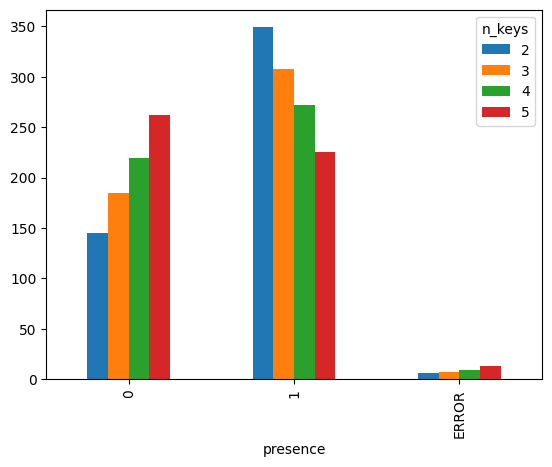

In [25]:
key_df.groupby(['presence', 'n_keys']).presence.value_counts().unstack().plot.bar()

In [36]:
import matplotlib.pyplot as plt

# Define the range of 'k' values for the analysis.
df = key_df.copy()
k_values = [1, 5, 10, 20, 30, 50, 100]
results = []

# Group the DataFrame by 'n_keys' to perform calculations for each group.
for n_key, group in df[df['presence']=='1'].groupby('n_keys'):
    total_items = len(group)
    if total_items == 0:
        continue

    for k in k_values:
        # A "hit" occurs if the 's_id_index' is a number (not NaN) and
        # its value is less than the current 'k'.
        
        
        hits = ((group['r_id_index'].notna()) & (group['r_id_index'] < k)).sum()
        
        
        # Calculate recall for the current 'k'.
        recall = hits / total_items
        results.append({'n_keys': n_key, 'k': k, 'recall_at_k': recall})

# Create a DataFrame from the calculated results.
recall_df = pd.DataFrame(results)

# Save the results to a new CSV file.
#recall_df.to_csv(output_csv, index=False)
#print(f"Results saved to {output_csv}")

# --- Plotting the results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

for n_key in recall_df['n_keys'].unique():
    subset = recall_df[recall_df['n_keys'] == n_key]
    ax.plot(subset['k'], subset['recall_at_k'], marker='o', linestyle='-', label=f'n_keys = {n_key}')

ax.set_title('Recall at k for different n_keys')
ax.set_xlabel('k')
ax.set_ylabel('Recall@k')
ax.set_xticks(k_values)
ax.legend()
ax.grid(True)

19


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

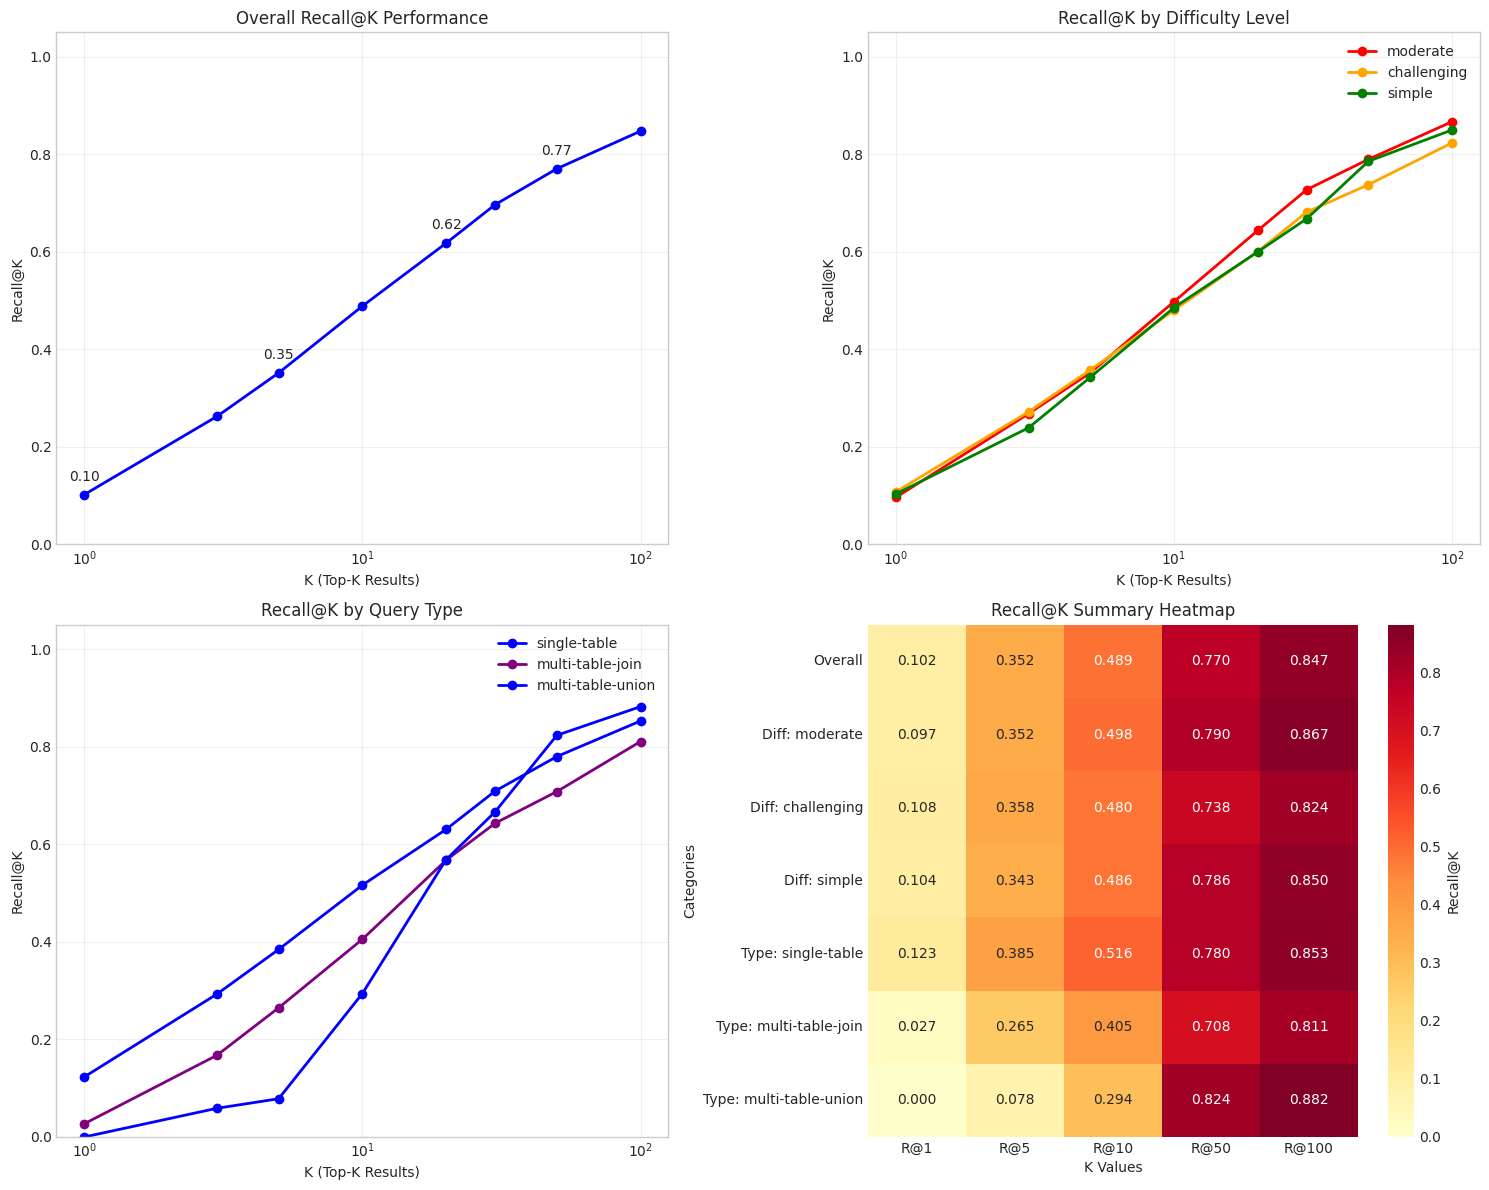

=== RECALL@K ANALYSIS RESULTS ===

Overall Performance:
Recall@  1: 0.102
Recall@  3: 0.263
Recall@  5: 0.352
Recall@ 10: 0.489
Recall@ 20: 0.618
Recall@ 30: 0.697
Recall@ 50: 0.770
Recall@100: 0.847

Dataset Statistics:
Total queries: 1154
Query types: ['single-table', 'multi-table-join', 'multi-table-union']
Difficulty levels: ['moderate', 'challenging', 'simple']

Index Analysis:
r_id_index range: 0.0 - 915.0
s_id_index non-null count: 200
s_id_index range: 0.0 - 756.0

Hit Analysis by n_keys:

n_keys = 2 (349 queries):
  Hits@ 1: 15/349 queries (4.3%)
  Hits@ 5: 61/349 queries (17.5%)
  Hits@10: 94/349 queries (26.9%)
  Hits@20: 139/349 queries (39.8%)
  Hits@50: 195/349 queries (55.9%)

n_keys = 3 (308 queries):
  Hits@ 1: 33/308 queries (10.7%)
  Hits@ 5: 100/308 queries (32.5%)
  Hits@10: 143/308 queries (46.4%)
  Hits@20: 189/308 queries (61.4%)
  Hits@50: 246/308 queries (79.9%)

n_keys = 4 (272 queries):
  Hits@ 1: 37/272 queries (13.6%)
  Hits@ 5: 128/272 queries (47.1%)
  H

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple


def calculate_recall_at_k(df: pd.DataFrame, k_values: List[int]) -> Tuple[List[int], List[float]]:
    """
    Calculate recall@k for different k values.
    
    A hit occurs when:
    - r_id_index is within top-k results
    - If s_id_index is not None, it should also be within top-k results
    
    Args:
        df: DataFrame with columns r_id_index, s_id_index, top_k
        k_values: List of k values to evaluate
        
    Returns:
        Tuple of (k_values, recall_scores)
    """
    recall_scores = []
    
    for k in k_values:
        hits = 0
        total_queries = len(df)
        
        for _, row in df.iterrows():
            r_id_index = row['r_id_index']
            s_id_index = row['s_id_index']
            
            # Check if r_id_index is a hit (within top-k)
            r_hit = r_id_index < k if pd.notna(r_id_index) else False
            
            # Check if s_id_index is a hit (within top-k) if it exists
            s_hit = True  # Default to True if s_id_index doesn't exist
            if pd.notna(s_id_index):
                s_hit = s_id_index < k
            
            # Both conditions must be met for a hit
            if r_hit and s_hit:
                hits += 1
        
        recall = hits / total_queries if total_queries > 0 else 0
        recall_scores.append(recall)
    
    return k_values, recall_scores

def calculate_recall_by_category(df: pd.DataFrame, k_values: List[int], category_col: str) -> dict:
    """
    Calculate recall@k for different categories (e.g., difficulty, type).
    
    Args:
        df: DataFrame with the data
        k_values: List of k values to evaluate
        category_col: Column name to group by
        
    Returns:
        Dictionary with category as key and (k_values, recall_scores) as values
    """
    results = {}
    
    for category in df[category_col].unique():
        if pd.notna(category):
            category_df = df[df[category_col] == category]
            k_vals, recall_vals = calculate_recall_at_k(category_df, k_values)
            results[category] = (k_vals, recall_vals)
    
    return results

df = key_df[key_df['presence'] == '1'].copy()
# Define k values to evaluate
k_values = [1, 3, 5, 10, 20, 30, 50, 100]

# Calculate overall recall@k
k_vals, recall_vals = calculate_recall_at_k(df, k_values)

# Calculate recall@k by difficulty and type
recall_by_difficulty = calculate_recall_by_category(df, k_values, 'difficulty')
recall_by_type = calculate_recall_by_category(df, k_values, 'type')

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Overall Recall@K
axes[0, 0].plot(k_vals, recall_vals, 'b-o', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('K (Top-K Results)')
axes[0, 0].set_ylabel('Recall@K')
axes[0, 0].set_title('Overall Recall@K Performance')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xscale('log')
axes[0, 0].set_ylim(0, 1.05)

# Add value annotations
for i, (k, recall) in enumerate(zip(k_vals, recall_vals)):
    if i % 2 == 0:  # Annotate every other point to avoid crowding
        axes[0, 0].annotate(f'{recall:.2f}', (k, recall), textcoords="offset points", xytext=(0,10), ha='center')

# 2. Recall@K by Difficulty
colors = ['red', 'orange', 'green']
for i, (difficulty, (k_vals_diff, recall_vals_diff)) in enumerate(recall_by_difficulty.items()):
    axes[0, 1].plot(k_vals_diff, recall_vals_diff, 'o-', label=difficulty, linewidth=2, markersize=6, color=colors[i % len(colors)])

axes[0, 1].set_xlabel('K (Top-K Results)')
axes[0, 1].set_ylabel('Recall@K')
axes[0, 1].set_title('Recall@K by Difficulty Level')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xscale('log')
axes[0, 1].set_ylim(0, 1.05)

# 3. Recall@K by Type
type_colors = ['blue', 'purple']
for i, (query_type, (k_vals_type, recall_vals_type)) in enumerate(recall_by_type.items()):
    axes[1, 0].plot(k_vals_type, recall_vals_type, 'o-', label=query_type, linewidth=2, markersize=6, color=type_colors[i % len(type_colors)])

axes[1, 0].set_xlabel('K (Top-K Results)')
axes[1, 0].set_ylabel('Recall@K')
axes[1, 0].set_title('Recall@K by Query Type')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xscale('log')
axes[1, 0].set_ylim(0, 1.05)

# 4. Summary Statistics Table (as a heatmap)
summary_data = []
categories = ['Overall']
k_summary = [1, 5, 10, 50, 100]

# Overall recall
overall_summary = []
for k in k_summary:
    k_idx = k_values.index(k)
    overall_summary.append(recall_vals[k_idx])
summary_data.append(overall_summary)

# By difficulty
for difficulty in recall_by_difficulty.keys():
    diff_summary = []
    k_vals_diff, recall_vals_diff = recall_by_difficulty[difficulty]
    for k in k_summary:
        k_idx = k_values.index(k)
        diff_summary.append(recall_vals_diff[k_idx])
    summary_data.append(diff_summary)
    categories.append(f"Diff: {difficulty}")

# By type
for query_type in recall_by_type.keys():
    type_summary = []
    k_vals_type, recall_vals_type = recall_by_type[query_type]
    for k in k_summary:
        k_idx = k_values.index(k)
        type_summary.append(recall_vals_type[k_idx])
    summary_data.append(type_summary)
    categories.append(f"Type: {query_type}")

# Create heatmap
summary_df = pd.DataFrame(summary_data, columns=[f'R@{k}' for k in k_summary], index=categories)

sns.heatmap(summary_df, annot=True, fmt='.3f', cmap='YlOrRd', 
           ax=axes[1, 1], cbar_kws={'label': 'Recall@K'})
axes[1, 1].set_title('Recall@K Summary Heatmap')
axes[1, 1].set_xlabel('K Values')
axes[1, 1].set_ylabel('Categories')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=== RECALL@K ANALYSIS RESULTS ===\n")

print("Overall Performance:")
for k, recall in zip(k_vals, recall_vals):
    print(f"Recall@{k:>3}: {recall:.3f}")

print(f"\nDataset Statistics:")
print(f"Total queries: {len(df)}")
print(f"Query types: {list(df['type'].unique())}")
print(f"Difficulty levels: {list(df['difficulty'].unique())}")

print(f"\nIndex Analysis:")
print(f"r_id_index range: {df['r_id_index'].min()} - {df['r_id_index'].max()}")
print(f"s_id_index non-null count: {df['s_id_index'].notna().sum()}")
if df['s_id_index'].notna().sum() > 0:
    print(f"s_id_index range: {df[df['s_id_index'].notna()]['s_id_index'].min()} - {df[df['s_id_index'].notna()]['s_id_index'].max()}")

# Additional analysis: Hit analysis
print(f"\nHit Analysis by n_keys:")
for n_key in sorted(df['n_keys'].unique()):
    n_key_df = df[df['n_keys'] == n_key]
    print(f"\nn_keys = {n_key} ({len(n_key_df)} queries):")
    for k in [1, 5, 10, 20, 50]:
        hits = 0
        for _, row in n_key_df.iterrows():
            r_hit = row['r_id_index'] < k if pd.notna(row['r_id_index']) else False
            s_hit = True if pd.isna(row['s_id_index']) else row['s_id_index'] < k
            if r_hit and s_hit:
                hits += 1
        hit_rate = hits / len(n_key_df) if len(n_key_df) > 0 else 0
        print(f"  Hits@{k:>2}: {hits:>2}/{len(n_key_df)} queries ({hit_rate:.1%})")

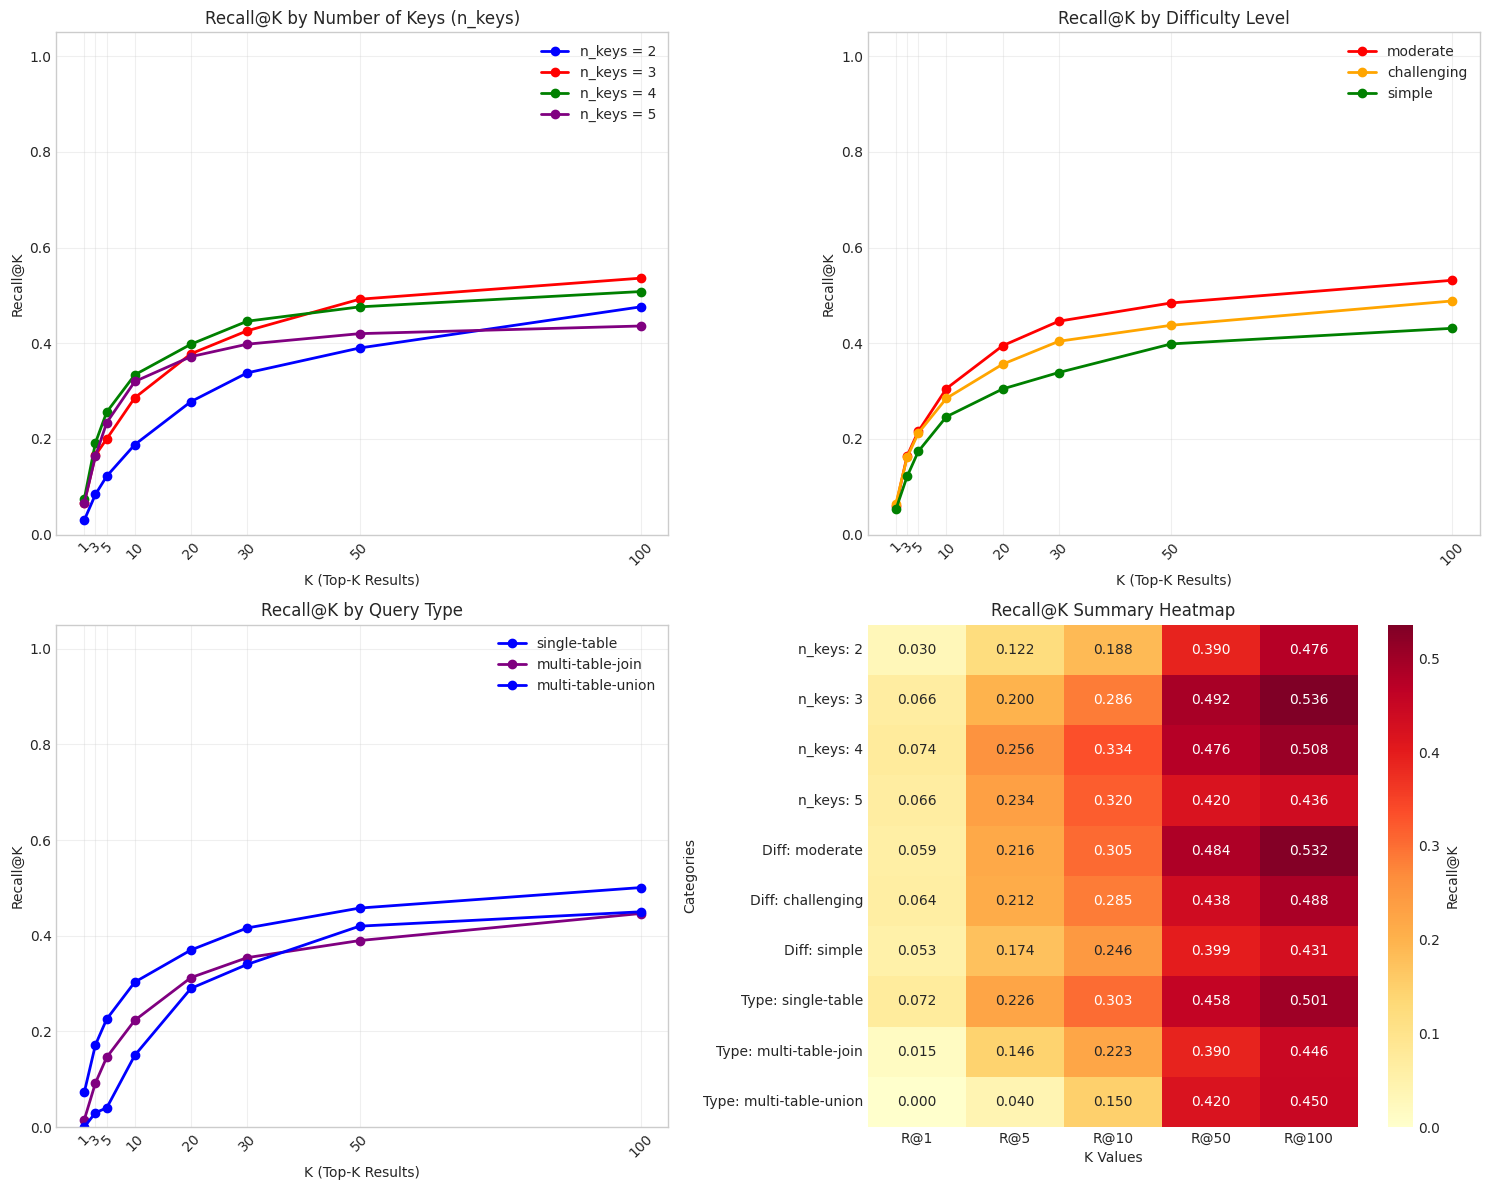

=== RECALL@K ANALYSIS RESULTS ===

Performance by Number of Keys (n_keys):

n_keys = 2:
  Recall@  1: 0.030
  Recall@  3: 0.084
  Recall@  5: 0.122
  Recall@ 10: 0.188
  Recall@ 20: 0.278
  Recall@ 30: 0.338
  Recall@ 50: 0.390
  Recall@100: 0.476

n_keys = 3:
  Recall@  1: 0.066
  Recall@  3: 0.166
  Recall@  5: 0.200
  Recall@ 10: 0.286
  Recall@ 20: 0.378
  Recall@ 30: 0.426
  Recall@ 50: 0.492
  Recall@100: 0.536

n_keys = 4:
  Recall@  1: 0.074
  Recall@  3: 0.192
  Recall@  5: 0.256
  Recall@ 10: 0.334
  Recall@ 20: 0.398
  Recall@ 30: 0.446
  Recall@ 50: 0.476
  Recall@100: 0.508

n_keys = 5:
  Recall@  1: 0.066
  Recall@  3: 0.164
  Recall@  5: 0.234
  Recall@ 10: 0.320
  Recall@ 20: 0.372
  Recall@ 30: 0.398
  Recall@ 50: 0.420
  Recall@100: 0.436

Dataset Statistics:
Total queries: 2000
n_keys distribution: {2: 500, 3: 500, 4: 500, 5: 500}
Query types: ['single-table', 'multi-table-join', 'multi-table-union']
Difficulty levels: ['moderate', 'challenging', 'simple']

Index Ana

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

def calculate_recall_at_k(df: pd.DataFrame, k_values: List[int]) -> Tuple[List[int], List[float]]:
    """
    Calculate recall@k for different k values.
    
    A hit occurs when:
    - r_id_index is within top-k results
    - If s_id_index is not None, it should also be within top-k results
    
    Args:
        df: DataFrame with columns r_id_index, s_id_index, top_k
        k_values: List of k values to evaluate
        
    Returns:
        Tuple of (k_values, recall_scores)
    """
    recall_scores = []
    
    for k in k_values:
        hits = 0
        total_queries = len(df)
        
        for _, row in df.iterrows():
            r_id_index = row['r_id_index']
            s_id_index = row['s_id_index']
            
            # Check if r_id_index is a hit (within top-k)
            r_hit = r_id_index < k if pd.notna(r_id_index) else False
            
            # Check if s_id_index is a hit (within top-k) if it exists
            s_hit = True  # Default to True if s_id_index doesn't exist
            if pd.notna(s_id_index):
                s_hit = s_id_index < k
            
            # Both conditions must be met for a hit
            if r_hit and s_hit:
                hits += 1
        
        recall = hits / total_queries if total_queries > 0 else 0
        recall_scores.append(recall)
    
    return k_values, recall_scores

def calculate_recall_by_category(df: pd.DataFrame, k_values: List[int], category_col: str) -> dict:
    """
    Calculate recall@k for different categories (e.g., difficulty, type).
    
    Args:
        df: DataFrame with the data
        k_values: List of k values to evaluate
        category_col: Column name to group by
        
    Returns:
        Dictionary with category as key and (k_values, recall_scores) as values
    """
    results = {}
    
    for category in df[category_col].unique():
        if pd.notna(category):
            category_df = df[df[category_col] == category]
            k_vals, recall_vals = calculate_recall_at_k(category_df, k_values)
            results[category] = (k_vals, recall_vals)
    
    return results

df = key_df.copy()#[key_df['presence'] == '1'].copy()
# Define k values to evaluate
k_values = [1, 3, 5, 10, 20, 30, 50, 100]

# Calculate recall@k by n_keys, difficulty and type
recall_by_n_keys = calculate_recall_by_category(df, k_values, 'n_keys')
recall_by_difficulty = calculate_recall_by_category(df, k_values, 'difficulty')
recall_by_type = calculate_recall_by_category(df, k_values, 'type')

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Recall@K by Number of Keys (n_keys)
n_keys_colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, (n_key, (k_vals_nkey, recall_vals_nkey)) in enumerate(recall_by_n_keys.items()):
    axes[0, 0].plot(k_vals_nkey, recall_vals_nkey, 'o-', label=f'n_keys = {n_key}', linewidth=2, markersize=6, color=n_keys_colors[i % len(n_keys_colors)])

axes[0, 0].set_xlabel('K (Top-K Results)')
axes[0, 0].set_ylabel('Recall@K')
axes[0, 0].set_title('Recall@K by Number of Keys (n_keys)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(k_values)
axes[0, 0].set_xticklabels([str(k) for k in k_values], rotation=45)
axes[0, 0].set_ylim(0, 1.05)

# 2. Recall@K by Difficulty
colors = ['red', 'orange', 'green']
for i, (difficulty, (k_vals_diff, recall_vals_diff)) in enumerate(recall_by_difficulty.items()):
    axes[0, 1].plot(k_vals_diff, recall_vals_diff, 'o-', label=difficulty, linewidth=2, markersize=6, color=colors[i % len(colors)])

axes[0, 1].set_xlabel('K (Top-K Results)')
axes[0, 1].set_ylabel('Recall@K')
axes[0, 1].set_title('Recall@K by Difficulty Level')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(k_values)
axes[0, 1].set_xticklabels([str(k) for k in k_values], rotation=45)
axes[0, 1].set_ylim(0, 1.05)

# 3. Recall@K by Type
type_colors = ['blue', 'purple']
for i, (query_type, (k_vals_type, recall_vals_type)) in enumerate(recall_by_type.items()):
    axes[1, 0].plot(k_vals_type, recall_vals_type, 'o-', label=query_type, linewidth=2, markersize=6, color=type_colors[i % len(type_colors)])

axes[1, 0].set_xlabel('K (Top-K Results)')
axes[1, 0].set_ylabel('Recall@K')
axes[1, 0].set_title('Recall@K by Query Type')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(k_values)
axes[1, 0].set_xticklabels([str(k) for k in k_values], rotation=45)
axes[1, 0].set_ylim(0, 1.05)

# 4. Summary Statistics Table (as a heatmap)
summary_data = []
categories = []
k_summary = [1, 5, 10, 50, 100]

# By n_keys
for n_key in recall_by_n_keys.keys():
    nkey_summary = []
    k_vals_nkey, recall_vals_nkey = recall_by_n_keys[n_key]
    for k in k_summary:
        k_idx = k_values.index(k)
        nkey_summary.append(recall_vals_nkey[k_idx])
    summary_data.append(nkey_summary)
    categories.append(f"n_keys: {n_key}")

# By difficulty
for difficulty in recall_by_difficulty.keys():
    diff_summary = []
    k_vals_diff, recall_vals_diff = recall_by_difficulty[difficulty]
    for k in k_summary:
        k_idx = k_values.index(k)
        diff_summary.append(recall_vals_diff[k_idx])
    summary_data.append(diff_summary)
    categories.append(f"Diff: {difficulty}")

# By type
for query_type in recall_by_type.keys():
    type_summary = []
    k_vals_type, recall_vals_type = recall_by_type[query_type]
    for k in k_summary:
        k_idx = k_values.index(k)
        type_summary.append(recall_vals_type[k_idx])
    summary_data.append(type_summary)
    categories.append(f"Type: {query_type}")

# Create heatmap
summary_df = pd.DataFrame(summary_data, columns=[f'R@{k}' for k in k_summary],index=categories)

sns.heatmap(summary_df, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1, 1], cbar_kws={'label': 'Recall@K'})
axes[1, 1].set_title('Recall@K Summary Heatmap')
axes[1, 1].set_xlabel('K Values')
axes[1, 1].set_ylabel('Categories')

plt.tight_layout()
plt.savefig('recall@k_prompt.pdf', bbox_inches='tight')
plt.show()


# Print detailed statistics
print("=== RECALL@K ANALYSIS RESULTS ===\n")

print("Performance by Number of Keys (n_keys):")
for n_key, (k_vals_nkey, recall_vals_nkey) in recall_by_n_keys.items():
    print(f"\nn_keys = {n_key}:")
    for k, recall in zip(k_vals_nkey, recall_vals_nkey):
        print(f"  Recall@{k:>3}: {recall:.3f}")

print(f"\nDataset Statistics:")
print(f"Total queries: {len(df)}")
print(f"n_keys distribution: {df['n_keys'].value_counts().sort_index().to_dict()}")
print(f"Query types: {list(df['type'].unique())}")
print(f"Difficulty levels: {list(df['difficulty'].unique())}")

print(f"\nIndex Analysis:")
print(f"r_id_index range: {df['r_id_index'].min()} - {df['r_id_index'].max()}")
print(f"s_id_index non-null count: {df['s_id_index'].notna().sum()}")
if df['s_id_index'].notna().sum() > 0:
    print(f"s_id_index range: {df[df['s_id_index'].notna()]['s_id_index'].min()} - {df[df['s_id_index'].notna()]['s_id_index'].max()}")

# Additional analysis: Hit analysis
print(f"\nHit Analysis by n_keys:")
for n_key in sorted(df['n_keys'].unique()):
    n_key_df = df[df['n_keys'] == n_key]
    print(f"\nn_keys = {n_key} ({len(n_key_df)} queries):")
    for k in [1, 5, 10, 20, 50]:
        hits = 0
        for _, row in n_key_df.iterrows():
            r_hit = row['r_id_index'] < k if pd.notna(row['r_id_index']) else False
            s_hit = True if pd.isna(row['s_id_index']) else row['s_id_index'] < k
            if r_hit and s_hit:
                hits += 1
        hit_rate = hits / len(n_key_df) if len(n_key_df) > 0 else 0
        print(f"  Hits@{k:>2}: {hits:>2}/{len(n_key_df)} queries ({hit_rate:.1%})")

In [ ]:
def run_evaluation(gt_file: str) -> float:
    """Runs the full evaluation and returns the success rate."""
    key_df = pd.read_csv('key_gt.csv')
    
    success_rate = sum(key_df[key_df['presence'] == 1]) / len(results)
    print(f"\nOverall Success Rate: {success_rate:.2%}")
    return success_rate



In [28]:
unsuccessful_key = key_df[key_df['presence'] == 0]
unsuccessful_key

,country_tag,type,difficulty,r_rsc_id,s_rsc_id,nl,keywords,prompt_tokens,completion_tokens,presence
3,CAN,single-table,moderate,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,According to the Government of New Brunswick’s...,departments+payments+new brunswick,887,817,0
6,CAN,multi-table-join,moderate,a7c95445-e336-41e3-945c-1bc938ff0612,ae2204c7-db9e-450e-8158-c70eedada7ae,"For each department, what are the total suppli...",payments+new+brunswick,884,674,0
7,CAN,multi-table-join,challenging,a7c95445-e336-41e3-945c-1bc938ff0612,ae2204c7-db9e-450e-8158-c70eedada7ae,How has the payment amount changed for the sam...,payments+suppliers+departments,905,636,0
8,CAN,multi-table-join,simple,ce336623-43d6-4e5d-81d8-26fb9145cf92,ab5df4ac-7f55-461b-934f-d7af48d18e6f,How do the operating expenses for different fi...,expenses+budget+british+columbia,906,1918,0
9,CAN,multi-table-join,moderate,ce336623-43d6-4e5d-81d8-26fb9145cf92,ab5df4ac-7f55-461b-934f-d7af48d18e6f,"For similar operating cost categories, how do ...",operating+costs+fiscal+years+british+columbia,882,3010,0
...,...,...,...,...,...,...,...,...,...,...
493,CAN,single-table,simple,f6a4e429-3c3c-42bf-9b9f-67492c96d715,NaN,Can you show me the details for the location n...,location+details+moravian47,873,228,0
494,CAN,single-table,moderate,f6a4e429-3c3c-42bf-9b9f-67492c96d715,NaN,What is the average code number and how many e...,classification+geography+canada,872,195,0
495,CAN,single-table,challenging,f6a4e429-3c3c-42bf-9b9f-67492c96d715,NaN,Can you provide the first entry for each type ...,geographical+types+canada,868,208,0
498,CAN,single-table,moderate,478e2826-bf6a-4b5f-872f-4bf34610c720,NaN,Could you tell me the total sum of the values ...,labour+market+assessments,898,247,0


In [29]:
can

,country_tag,type,difficulty,success,r_rsc_id,s_rsc_id,r_pkg_id,s_pkg_id,r_col_name,s_col_name,sql,nl,sql_success,tot_time
0,CAN,single-table,moderate,True,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,NaN,NaN,"SELECT ""department_/_minista_re"", SUM(""payment...",What is the total amount paid by each departme...,success,79.261
1,CAN,single-table,challenging,True,a7c95445-e336-41e3-945c-1bc938ff0612,NaN,12c89aa5-063a-f0ed-334a-3019133b9ee8,NaN,NaN,NaN,"WITH RankedPayments AS ( SELECT *, ROW_NUMBER(...",Which supplier received the highest payment fr...,success,86.872
2,CAN,single-table,simple,True,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,NaN,NaN,"SELECT * FROM R WHERE ""payment_/_paiement"" > 1...","Which suppliers received payments over $100,00...",success,81.511
3,CAN,single-table,moderate,True,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,NaN,NaN,"SELECT ""department_/_minista_re"", SUM(""payment...",According to the Government of New Brunswick’s...,success,110.778
4,CAN,single-table,challenging,True,ae2204c7-db9e-450e-8158-c70eedada7ae,NaN,4879e498-c9ac-44a3-d7d1-21af22e2224c,NaN,NaN,NaN,"WITH RankedPayments AS (SELECT *, ROW_NUMBER()...",According to the Government of New Brunswick’s...,success,95.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CAN,single-table,challenging,True,f6a4e429-3c3c-42bf-9b9f-67492c96d715,NaN,1d11dbb2-c8cb-41d9-af80-7d11dd48b453,NaN,NaN,NaN,"WITH RankedElements AS ( SELECT *, ROW_NUMBER(...",Can you provide the first entry for each type ...,success,11.503
496,CAN,multi-table-join,simple,True,f6a4e429-3c3c-42bf-9b9f-67492c96d715,fbdf58d3-5dea-4b45-baa3-9ce7a0624336,1d11dbb2-c8cb-41d9-af80-7d11dd48b453,116fef53-e6ec-4b0c-a45a-3387b1126048,class_title,class_title,"SELECT r.code, r.class_title, s.class_title AS...",Which class titles from the Standard Geographi...,success,29.801
497,CAN,single-table,challenging,True,9b09549a-4f6b-4d17-ae6d-ccf05dd515ac,NaN,3903d7e9-1321-4f0f-aafe-3c7da6b30f30,NaN,NaN,NaN,"SELECT geo, gender__3_, AVG(""occupation___stem...","According to Statistics Canada’s 2021 data, wh...",success,41.849
498,CAN,single-table,moderate,True,478e2826-bf6a-4b5f-872f-4bf34610c720,NaN,76defa14-473e-41e2-abfa-60021c4d934b,NaN,NaN,NaN,"SELECT SUM(CAST(REPLACE(""unnamed:_2"", ',', '')...",Could you tell me the total sum of the values ...,success,57.211


In [33]:
unsuccessful_key = pd.merge(unsuccessful_key, can[['r_pkg_id', 's_pkg_id']], left_index=True, right_index=True)

In [34]:
unsuccessful_key['keywords']

3                 departments+payments+new brunswick
6                             payments+new+brunswick
7                     payments+suppliers+departments
8                   expenses+budget+british+columbia
9      operating+costs+fiscal+years+british+columbia
                           ...                      
493                      location+details+moravian47
494                  classification+geography+canada
495                        geographical+types+canada
498                        labour+market+assessments
499                        labour+market+assessments
Name: keywords, Length: 381, dtype: object

In [35]:
# while presence != 1 or niter < 5
# for this question: Q you generated this wrong keywords list(old_generated_key) in the ckan_url try to regenerate the correct one

In [36]:
import requests
import json


def get_correct_keywords(ckan_url:str, pkg_id:str):
    # --- Configuration ---
    # Replace with your CKAN instance's base URL
    #CKAN_URL = "https://open.canada.ca/data" 
    # Replace with the ID or name of the package you want to find
    #PACKAGE_ID = "12c89aa5-063a-f0ed-334a-3019133b9ee8" # Example using package name/slug
    
    # --- API Call ---
    # The full URL for the 'package_show' action
    api_url = f"{ckan_url}/3/action/package_show"
    
    # The data payload for the POST request
    payload = {"id": pkg_id}
    
    print(f"🔎 Searching for package ID or name: {pkg_id} at {ckan_url}")
    keywords = []
    try:
        # Make the POST request to the CKAN API
        response = requests.post(api_url, json=payload)
    
        # Raise an exception for bad status codes (4xx or 5xx)
        response.raise_for_status()
    
        # Parse the JSON response
        response_data = response.json()
    
        # Check if the API call was successful
        if response_data.get("success"):
            print("✅ Success! Package found.")
            package_metadata = response_data.get("result", {})
            
            # Pretty-print the package metadata
            #print(json.dumps(package_metadata, indent=2))
            print(package_metadata['keywords']['en'])
            return package_metadata['keywords']['en']
    
    
    except requests.exceptions.RequestException as e:
        # Handle network-related errors
        return []
    except json.JSONDecodeError:
        # Handle cases where the response is not valid JSON
        return []

In [66]:
async def generate_keys(client: OpenAIChatCompletionClient, query_prompt:str, question:str, n_keywords:int, api_base_url:str, portal_url:str, top_k_results:int = 10):
    formatted_prompt = query_prompt.format(
        api=api_base_url, portal=portal_url, top_k_results=top_k_results, n_keywords=n_keywords
    )

    analyzer = AssistantAgent(
        name="QueryAnalyzer",
        model_client=model_client,
        system_message=formatted_prompt
    )
    
    response = await analyzer.run(task=question)
    response = response.messages[-1]
    #print(response.content)

    models_usage = response.models_usage

    match = re.search(r"<keywords>(.*?)</keywords>", response.content, re.DOTALL)
    keys = ""
    if match:
        keys = match.group(1).strip()
    
    return keys, response.content, models_usage.prompt_tokens, models_usage.completion_tokens
    

In [67]:
import re
import requests # Replaced aiohttp and asyncio

def fetch_ckan_results(ckan_query_url: str, keys:str, limit_value:int):
    """Fetches dataset results from a CKAN API endpoint."""
    # This part remains unchanged
    #match = re.search(r'limit=(\d+)', ckan_query_url)
    #limit_value = int(match.group(1)) if match else 10
    #TODO substitute space check len 'keys+'
    ckan_query_url = f"{ckan_query_url}q={keys}&defType=edismax&sort=sort asc&rows={limit_value}"
    n_results = 0
    print(ckan_query_url)
    
    try:
        # Replaced the async block with a single synchronous call
        response = requests.get(ckan_query_url)
        response.raise_for_status() # Checks for HTTP errors (e.g., 404, 500)
        
        # Removed 'await' from the .json() call
        data = response.json() 
        results = data["result"]["results"]
        print(data["result"]["count"])
        # This part remains unchanged
        csv_resources = [
            (r["title"], res.get("description", "No description"), res["url"], res["id"])
            for r in results[:limit_value]
            for res in r.get("resources", [])
            if res.get("format", "").strip().lower() in ["csv", "zip"]
            and "-fra" not in res.get("url", "").lower()
        ]
        #print(csv_resources)
        return csv_resources
    
    except requests.exceptions.RequestException as e:
        # It's good practice to handle potential network or HTTP errors
        print(f"An error occurred during the request: {e}")
        return []
    except KeyError:
        # Handle cases where the JSON structure is not as expected
        print("Error: Unexpected JSON structure received from the API.")
        return []

In [65]:
prompt_path = os.path.join("..", "backend", "prompts", "QueryAnalyzer.md")

try:
    with open(prompt_path, "r", encoding="utf-8") as f:
        QUERY_ANALYZER_PROMPT_think = f.read()
except FileNotFoundError:
    QUERY_ANALYZER_PROMPT_think  = "" # Assign an empty string if the file is not found

import random


for index, row in unsuccessful_key[:10].iterrows():
    question = row['nl']
    print(question)
    key = row['keywords']
    wrong = []
    wrong.append(key)
    presence = row['presence']
    niter = 0
    correct_example = get_correct_keywords(api_base_url,  row['r_pkg_id'])
    if row['s_pkg_id']:
        correct_example += get_correct_keywords(api_base_url, row['s_pkg_id'])
    
  
    while (presence != 1) and (niter < 10):
        prompt = f"**User Question**: {question}\n **Do not re-use this Wrong Generated Keys**: {wrong} - Try to add the year in the keywords if there is (if there are multiple years use the biggest one)\n **Correct Keywords Examples, do not use all, only a subset**: {correct_example}\n\n Mantain always 2-3 keywords\n"
        url, prompt_tokens, completion_tokens = await generate_keys(
            model_client, QUERY_ANALYZER_PROMPT_think, prompt, n_keywords, api_base_url, portal_url, top_k_results=20
        )
        #url = "https://open.canada.ca/data/api/3/action/package_search?q=supplier;limit=20"

        results = fetch_ckan_results(url)
        res_ids_set = [r[3] for r in results]

        presence = check_id_presence(row['r_rsc_id'], row['s_rsc_id'], res_ids_set)
        print(presence)
        print(extract_keywords(url))
        if not presence:
            wrong.append(extract_keywords(url))

        else:
            # Insert new values in the key_df
            print(f"**Correct Keywords**: {extract_keywords(url)}")
            correct_example.append(f"{question} - **Correct Keywords**: {extract_keywords(url)}")

        niter += 1        

According to the Government of New Brunswick’s public accounts for the fiscal year ended March 31, 2023, which departments received the highest total payments, and what were those amounts in descending order?
🔎 Searching for package ID or name: 4879e498-c9ac-44a3-d7d1-21af22e2224c at https://open.canada.ca/data/api
✅ Success! Package found.
['public accounts', 'comptes', 'supplier lists', 'listes de fournisseurs']
🔎 Searching for package ID or name: nan at https://open.canada.ca/data/api
https://open.canada.ca/data/api/3/action/package_search?q=payments+departments+2023&defType=edismax&sort=sort asc&rows=20
1
payments+departments+2023
**Correct Keywords**: payments+departments+2023
For each department, what are the total supplier and grant payments made in fiscal year 2020 compared to those in fiscal year 2023 according to New Brunswick's public accounts?
🔎 Searching for package ID or name: 12c89aa5-063a-f0ed-334a-3019133b9ee8 at https://open.canada.ca/data/api
✅ Success! Package found

CancelledError: 

In [44]:
can_gt = gt[gt['country_tag'] == 'CAN']

In [45]:
can_gt.iloc[3]


country_tag                                                  CAN
type                                                single-table
difficulty                                              moderate
success                                                     True
r_rsc_id                    ae2204c7-db9e-450e-8158-c70eedada7ae
s_rsc_id                                                     NaN
r_pkg_id                    4879e498-c9ac-44a3-d7d1-21af22e2224c
s_pkg_id                                                     NaN
r_rsc_name     2023 - Supplier and Grant Payments by Departme...
s_rsc_name                                                   NaN
r_col_name                                                   NaN
s_col_name                                                   NaN
sql            SELECT "department_/_minista_re", SUM("payment...
nl             According to the Government of New Brunswick’s...
sql_success                                              success
sql_time                 

In [65]:
https://open.canada.ca/data/api/3/action/package_search?q=&fq=id=a7c95445-e336-41e3-945c-1bc938ff0612

SyntaxError: invalid decimal literal (995918327.py, line 1)

In [68]:
import requests
import json

# --- Configuration ---
# Replace with your CKAN instance's base URL
CKAN_URL = "https://open.canada.ca/data"
# Replace with the ID of the resource you want to find
RESOURCE_ID = "a7c95445-e336-41e3-945c-1bc938ff0612" # Example ID

# --- API Call ---
# The full URL for the 'resource_show' action
api_url = f"{CKAN_URL}/api/3/action/resource_show"

# The data payload for the POST request
payload = {"id": RESOURCE_ID}

print(f"🔎 Searching for resource ID: {RESOURCE_ID} at {CKAN_URL}")

try:
    # Make the POST request to the CKAN API
    response = requests.post(api_url, json=payload)

    # Raise an exception for bad status codes (4xx or 5xx)
    response.raise_for_status()

    # Parse the JSON response
    response_data = response.json()

    # Check if the API call was successful
    if response_data.get("success"):
        print("✅ Success! Resource found.")
        resource_metadata = response_data.get("result", {})
        
        # Pretty-print the resource metadata
        print(json.dumps(resource_metadata, indent=2))
    else:
        # Handle API-level errors (e.g., resource not found)
        error = response_data.get("error", {})
        print(f"❌ API Error: {error.get('message', 'Unknown error')}")

except requests.exceptions.RequestException as e:
    # Handle network-related errors (e.g., connection error)
    print(f"❌ Network Error: {e}")
except json.JSONDecodeError:
    # Handle cases where the response is not valid JSON
    print("❌ Failed to decode JSON from response.")

🔎 Searching for resource ID: a7c95445-e336-41e3-945c-1bc938ff0612 at https://open.canada.ca/data
✅ Success! Resource found.
{
  "cache_last_updated": null,
  "cache_url": null,
  "created": "2024-07-24T15:55:16.198760",
  "data_quality": [],
  "datastore_active": false,
  "description": null,
  "format": "CSV",
  "hash": "",
  "id": "a7c95445-e336-41e3-945c-1bc938ff0612",
  "language": [
    "en",
    "fr"
  ],
  "last_modified": null,
  "metadata_modified": "2024-07-24T15:55:16.169715",
  "mimetype": null,
  "mimetype_inner": null,
  "name": "2020 - Supplier and Grant Payments by Department (CSV)",
  "name_translated": {
    "en": "2020 - Supplier and Grant Payments by Department (CSV)",
    "fr": "Paiements aux fournisseurs et des subventions par minist\u00e8re (CSV)"
  },
  "package_id": "12c89aa5-063a-f0ed-334a-3019133b9ee8",
  "position": 1,
  "resource_type": "dataset",
  "state": "active",
  "url": "https://gnb.socrata.com/api/views/x5ie-5bt6/rows.csv?accessType=DOWNLOAD",
  "ur

In [169]:
import requests
import json


def get_correct_keywords(ckan_url:str, pkg_id:str):
    # --- Configuration ---
    # Replace with your CKAN instance's base URL
    #CKAN_URL = "https://open.canada.ca/data" 
    # Replace with the ID or name of the package you want to find
    #PACKAGE_ID = "12c89aa5-063a-f0ed-334a-3019133b9ee8" # Example using package name/slug
    
    # --- API Call ---
    # The full URL for the 'package_show' action
    api_url = f"{ckan_url}/api/3/action/package_show"
    
    # The data payload for the POST request
    payload = {"id": pkg_id}
    
    print(f"🔎 Searching for package ID or name: {pkg_id} at {ckan_url}")
    keywords = []
    try:
        # Make the POST request to the CKAN API
        response = requests.post(api_url, json=payload)
    
        # Raise an exception for bad status codes (4xx or 5xx)
        response.raise_for_status()
    
        # Parse the JSON response
        response_data = response.json()
    
        # Check if the API call was successful
        if response_data.get("success"):
            print("✅ Success! Package found.")
            package_metadata = response_data.get("result", {})
            
            # Pretty-print the package metadata
            print(json.dumps(package_metadata, indent=2))
            print(package_metadata['keywords']['en'])
            return package_metadata['keywords']['en']
    
    
    except requests.exceptions.RequestException as e:
        # Handle network-related errors
        return []
    except json.JSONDecodeError:
        # Handle cases where the response is not valid JSON
        return []

In [170]:
get_correct_keywords("https://open.canada.ca/data", "bba41250-261a-4f3b-9ce8-db44d9a0f725")

🔎 Searching for package ID or name: bba41250-261a-4f3b-9ce8-db44d9a0f725 at https://open.canada.ca/data
✅ Success! Package found.
{
  "association_type": [],
  "audience": [],
  "author": null,
  "author_email": null,
  "collection": "primary",
  "contributor": {
    "fr": "",
    "en": ""
  },
  "creator": "",
  "creator_user_id": "2dc5a12f-2a6f-4822-8514-165ea6bb05d9",
  "data_series_issue_identification": {
    "fr": "",
    "en": ""
  },
  "data_series_name": {
    "fr": "",
    "en": ""
  },
  "date_published": "2020-11-23 00:00:00",
  "digital_object_identifier": "https://doi.org/10.35002/xy93-dw49 ",
  "display_flags": [],
  "frequency": "as_needed",
  "geographic_region": [],
  "id": "bba41250-261a-4f3b-9ce8-db44d9a0f725",
  "imso_approval": "true",
  "isopen": false,
  "jurisdiction": "federal",
  "keywords": {
    "fr": [
      "REC",
      "\u00c9nergie",
      "Production d\u2019\u00e9lectricit\u00e9",
      "Production de gaz naturel",
      "Production de p\u00e9trole",
 

['CER',
 'Energy',
 'Electricity',
 'Generation',
 'Energy demand',
 'Natural gas production',
 'Oil production',
 'Energy use',
 'Energy production',
 'Energy demand by sector',
 'Energy use by fuel']

In [80]:
import requests
import json

# --- Configuration ---
CKAN_URL = "http://demo.ckan.org"
# The keyword or name fragment you want to search for
SEARCH_TERM = "supplier new brunswick"

# --- API Call ---
# Use the 'package_search' action
api_url = f"{CKAN_URL}/api/3/action/package_search"

# Use the 'q' parameter for a keyword search.
# This example searches for the term within the 'title' field.
params = {'q': f'title:{SEARCH_TERM}'}

print(f"🔎 Searching for packages with '{SEARCH_TERM}' in their title...")

try:
    # A GET request is typically used for search queries
    response = requests.get(api_url, params=params)
    response.raise_for_status()  # Check for HTTP errors

    response_data = response.json()

    if response_data.get("success"):
        # The search results are in a list under result['results']
        search_results = response_data['result']['results']
        result_count = response_data['result']['count']

        print(f"✅ Success! Found {result_count} matching package(s).")

        # Print the title and name of each result
        for package in search_results:
            print(f"  - Title: {package.get('title')}")
            print(f"    Name: {package.get('name')}\n")
    else:
        error = response_data.get("error", {})
        print(f"❌ API Error: {error.get('message', 'Unknown error')}")

except requests.exceptions.RequestException as e:
    print(f"❌ Network Error: {e}")

🔎 Searching for packages with 'supplier new brunswick' in their title...
✅ Success! Found 0 matching package(s).


In [42]:
response = requests.get('https://search.open.canada.ca/data/?sort=score+desc&search_text=payments%2Bnew%2Bbrunswick%2B2023')
response.raise_for_status() 

response.text

'\n\n\n\n \n<!DOCTYPE html>\n<!--[if lt IE 9]><html class="no-js lt-ie9" lang="en" dir="ltr"><![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr"><!--<![endif]-->\n\t<head>\n    <meta charset="utf-8">\n    <!-- Web Experience Toolkit (WET) / Boîte à outils de l\'expérience Web (BOEW)\n            wet-boew.github.io/wet-boew/License-en.html / wet-boew.github.io/wet-boew/Licence-fr.html -->\n    <title>Open Government Portal</title>\n    <meta content="width=device-width,initial-scale=1" name="viewport">\n    <meta http-equiv="content-type" content="text/html; charset=utf-8"/>\n\n    <!-- Meta data -->\n    \n    <meta name="description" content="Effectuez des recherches dans les données du gouvernement du Canada, apprenez comment travailler avec les jeux de données, et voyez comment nos données ont été utilisées.">\n    <meta name="dcterms:creator" content="Treasury Board of Canada Secretariat"/>\n    <meta name="dcterms:service" content="OG-GO"/>\n    <meta name=